In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(autoload_with = engine)

In [6]:
# View all of the classes that automap found
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [18]:
# Find the most recent date in the data set.
date = session.query(measurement.date).order_by(measurement.date.desc()).first()
date

('2017-08-23',)

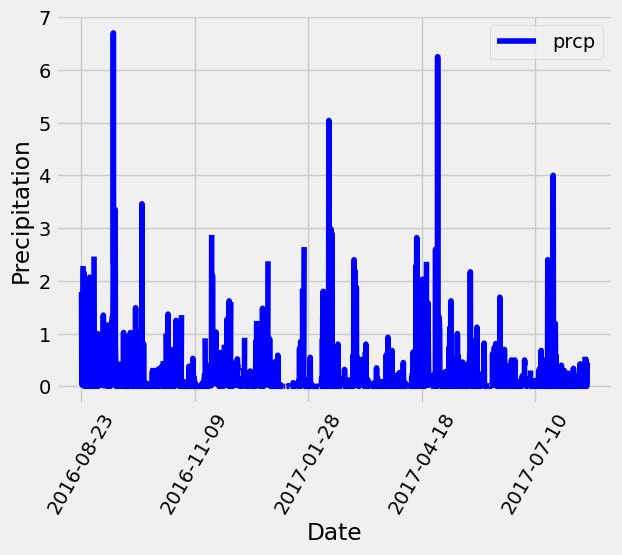

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
end_date = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set.
start_date = end_date - dt.timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores
precip_scores = session.query(measurement.date, measurement.prcp).filter(measurement.date >= start_date)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
#id, station, date, prcp, tobs
prcp_df = pd.DataFrame(precip_scores, columns = ['date', 'prcp'])

# Sort the dataframe by date
prcp_df = prcp_df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(x='date', y='prcp', rot=60, color='blue')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.legend(loc = 'best')
plt.show()


In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
stations = session.query(station.id).distinct().count()
print(stations)

9


In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active = session.query(measurement.station, func.count(measurement.id)).\
    group_by(measurement.station).order_by(func.count(measurement.id).desc())

for station in most_active:
    print(station)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temps = session.query(func.min(measurement.tobs),
                     func.max(measurement.tobs),
                     func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281')
for temp in temps:
    print(temp)

(54.0, 85.0, 71.66378066378067)


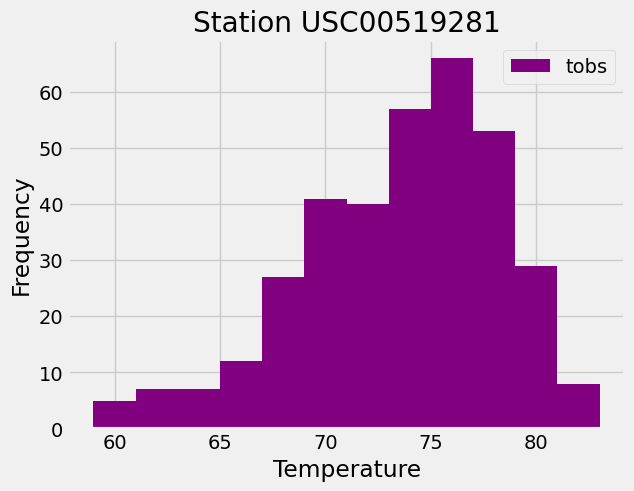

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station
active_temps = session.query(measurement.tobs).\
    filter(measurement.date >= start_date).\
    filter(measurement.station == 'USC00519281')

# Plot the results as a histogram
temp_df = pd.DataFrame(active_temps, columns =['tobs'])
temp_df.plot.hist(column = 'tobs', bins = 12, color='purple')
plt.xlabel('Temperature')
plt.title('Station USC00519281')
plt.show()

# Close Session

In [16]:
# Close Session
session.close()